# Cluster Analysis in Python
## 1. Introduction to Clustering
## 2. Hierarchical Clustering
## 3. K-Means Clustering
## 4. Clustering in Real World




## 1. Introduction to Clustering

In [ ]:
# Unsupervised learning: basics

**Unsupervised learning in real world**

Which of the following examples can be solved with unsupervised learning?

**Possible Answers**

- [ ] A list of tweets to be classified based on their sentiment, the data has tweets associated with a positive or negative sentiment.
- [ ] A spam recognition system that marks incoming emails as spam, the data has emails marked as spam and not spam.
- [x] Segmentation of learners at DataCamp based on courses they complete. The training data has no labels.

That is correct! As the training data has no labels, an unsupervised algorithm needs to be used to understand patterns in the data.

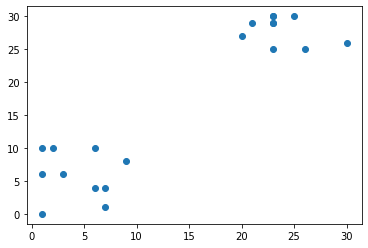

In [2]:
# Pokémon sightings

# Import plotting class from matplotlib library
from matplotlib import pyplot as plt

x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

# Create a scatter plot
plt.scatter(x, y)

# Display the scatter plot
plt.show()

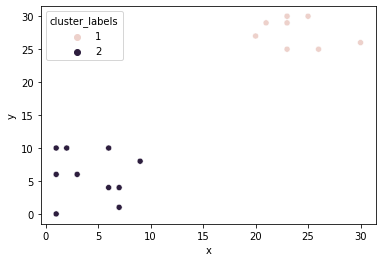

In [6]:
# Basics of cluster analysis

# Pokémon sightings: hierarchical clustering

import pandas as pd
import seaborn as sns
df = pd.DataFrame(data={'x':x,'y':y})

# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

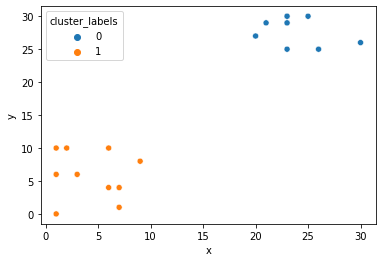

In [7]:
# Pokémon sightings: k-means clustering

df = df.drop('cluster_labels', axis=1).astype(float)

# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

In [8]:
# Data preparation for cluster analysis

# Normalize basic list data

# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


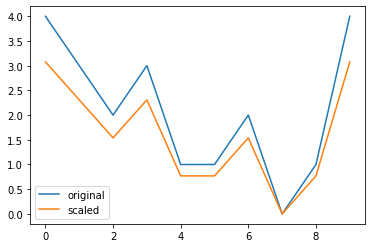

In [9]:
# Visualize normalized data

# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

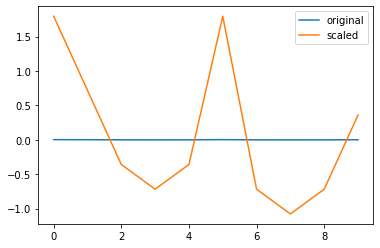

In [11]:
# Normalization of small numbers

from scipy.cluster.vq import whiten

# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

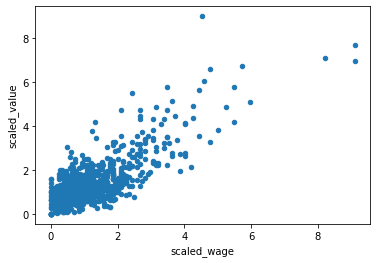

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [16]:
# FIFA 18: Normalize data


import pandas as pd
filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/fifa_18_sample_data.csv'
fifa = pd.read_csv(filename)

from scipy.cluster.vq import whiten

# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind='scatter')
plt.show()

# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())

## 2. Hierarchical Clustering

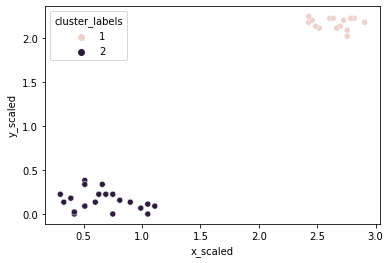

In [18]:
# Basics of hierarchical clustering

# Hierarchical clustering: ward method

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/comic_con.csv'
comic_con = pd.read_csv(filename)

# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

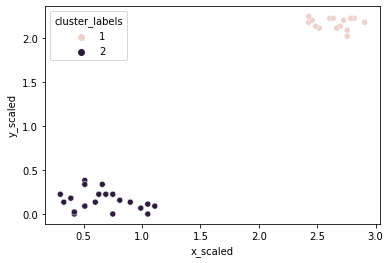

In [19]:
# Hierarchical clustering: single method

# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

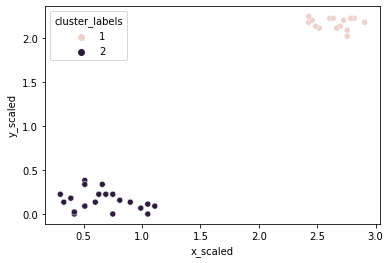

In [20]:
# Hierarchical clustering: complete method

# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'complete', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

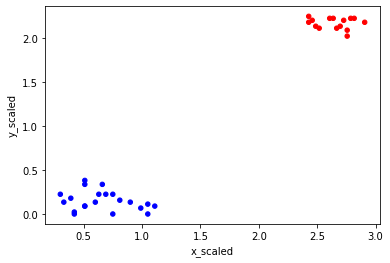

In [21]:
# Visualize clusters

# Visualize clusters with matplotlib

# Import the pyplot class
import matplotlib.pyplot as plt

# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x = 'x_scaled', 
                	   y = 'y_scaled',
                	   c = comic_con['cluster_labels'].map(colors))
plt.show()

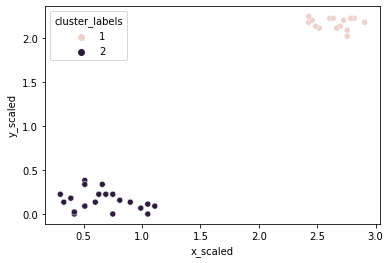

In [22]:
# Visualize clusters with seaborn

# Import the seaborn module
import seaborn as sns

# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data = comic_con)
plt.show()

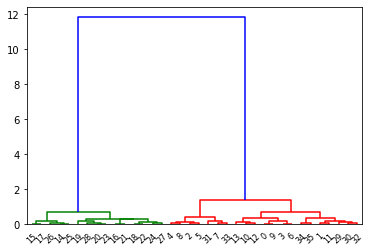

In [24]:
# How many clusters?

# Create a dendrogram

distance_matrix = linkage(comic_con[['x_scaled','y_scaled']],method='ward',metric='euclidean')

# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

**How many clusters in comic con data?**

Given the dendrogram from the last exercise, how many clusters can you see in the data?

A dendrogram is stored in the variable dn. Use plt.show() to display the dendrogram.

**Possible Answers**

- [x] 2 clusters
- [ ] 3 clusters
- [ ] 4 clusters

In [ ]:
# Limitations of hierarchical clustering

In [25]:
%timeit linkage(comic_con[['x_scaled','y_scaled']],method='ward',metric='euclidean')

The slowest run took 4.35 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 713 µs per loop


**Timing run of hierarchical clustering**

In earlier exercises of this chapter, you have used the data of Comic-Con footfall to create clusters. In this exercise you will time how long it takes to run the algorithm on DataCamp's system.

Remember that you can time the execution of small code snippets with:

`%timeit sum([1, 3, 2])`

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. The timeit module and linkage function are already imported

How long does it take to the run the linkage function on the comic con data?

**Possible Answers**

- [ ] 1-5 microseconds
- [x] 1-5 milliseconds
- [ ] 1-5 seconds

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            0.987373           1.849142
2                            3.013487           4.063492
3                            1.934455           3.210802


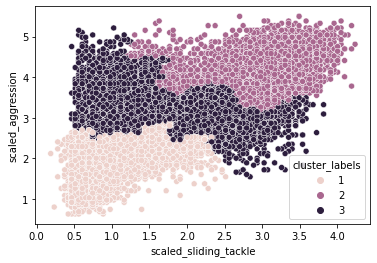

In [30]:
# FIFA 18: exploring defenders

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/fifa_18_dataset.csv'
fifa = pd.read_csv(filename)

fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()

## 3. K-Means Clustering

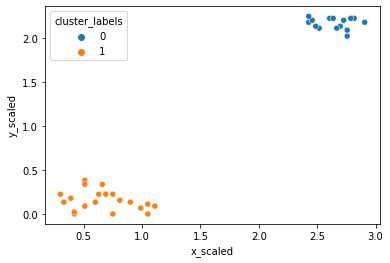

In [31]:
# Basics of k-means clustering

# K-means clustering: first exercise

# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

**Runtime of k-means clustering**

Recall that it took a significantly long time to run hierarchical clustering. How long does it take to run the kmeans() function on the FIFA dataset?

The data is stored in a Pandas data frame, fifa. scaled_sliding_tackle and scaled_aggression are the relevant scaled columns. timeit and kmeans have been imported.

Cluster centers are defined through the kmeans() function. It has two required arguments: observations and number of clusters. You can use %timeit before a piece of code to check how long it takes to run. You can time the kmeans() function for three clusters on the fifa dataset.

**Possible Answers**

- [ ] ~ 50 μs (microseconds)
- [x] ~ 50 ms (milliseconds)
- [ ] ~ 50 s (seconds)

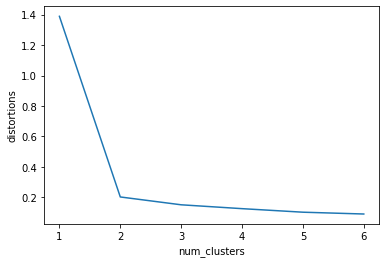

In [32]:
# How many clusters?

# Elbow method on distinct clusters

distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

**Elbow method on distinct clusters**

Let us use the comic con data set to see how the elbow plot looks on a data set with distinct, well-defined clusters. You may want to display the data points before proceeding with the exercise.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

**Question**

From the elbow plot, how many clusters are there in the data?

**Possible Answers**

- [x] 2 clusters
- [ ] 4 clusters
- [ ] 6 clusters

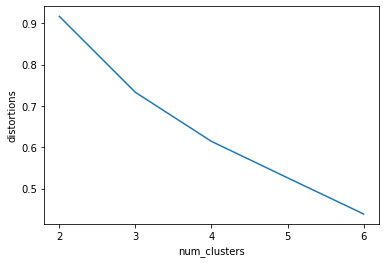

In [35]:
# Elbow method on uniform data

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/uniform_data.csv'
uniform_data = pd.read_csv(filename)

distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

**Elbow method on uniform data**

In the earlier exercise, you constructed an elbow plot on data with well-defined clusters. Let us now see how the elbow plot looks on a data set with uniformly distributed points. You may want to display the data points on the console before proceeding with the exercise.

The data is stored in a Pandas data frame, uniform_data. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of points.

**Question**

From the elbow plot, how many clusters are there in the data?

**Possible Answers**

- [x] Can not be determined
- [ ] 3 clusters
- [ ] 4 clusters

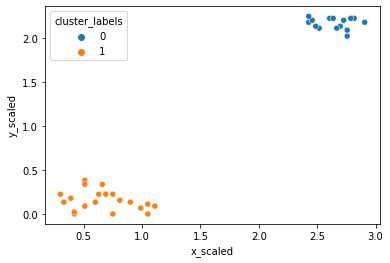

In [38]:
# Limitations of k-means clustering

# Impact of seeds on distinct clusters

# Import random class
from numpy import random

# Initialize seed
# random.seed(0)
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

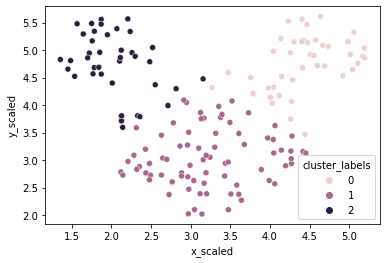

In [41]:
# Uniform clustering patterns

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/mouse.csv'
mouse = pd.read_csv(filename)

# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled', 'y_scaled']], 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = mouse)
plt.show()

                scaled_def  scaled_phy
cluster_labels                        
0                 1.948298    7.163234
1                 3.817844    9.020452
2                 2.072803    9.066327


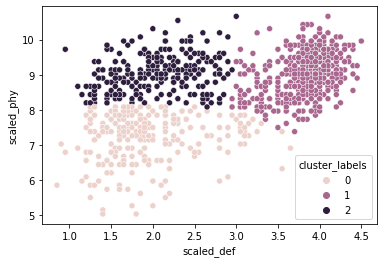

In [44]:
# FIFA 18: defenders revisited

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/fifa_18_sample_data.csv'
fifa = pd.read_csv(filename)
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

# Set up a random seed in numpy
random.seed([1000, 2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'],_ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()

## 4. Clustering in Real World

In [48]:
# Dominant colors in images

# Extract RGB values from image

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/images/batman.jpeg'

# Import image class of matplotlib
import matplotlib.image as img

# Read batman image and print dimensions
from imageio import imread
batman_image = imread(filename)
# batman_image = img.imread(filename, format='JPG')
print(batman_image.shape)

r = []
g = []
b = []

# Store RGB values of all pixels in lists r, g and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(169, 269, 3)


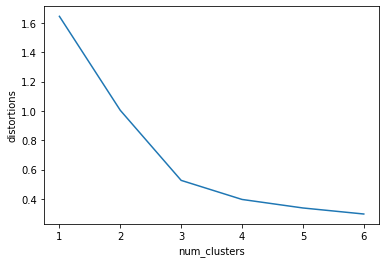

In [49]:
# How many dominant colors?

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/batman_df.csv'
batman_df =  pd.read_csv(filename)

distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters':num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

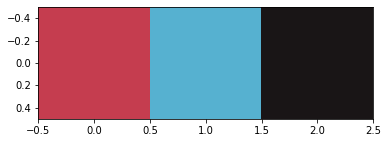

In [51]:
# Display dominant colors

cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], 3)

# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

colors = []
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

In [83]:
# Document clustering

# TF-IDF of movie plots

stop_words_2= ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'youre',
 'youve',
 'youll',
 'youd',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'shes',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'thatll',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 'dont',
 'should',
 'shouldve',
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 'arent',
 'couldn',
 'couldnt',
 'didn',
 'didnt',
 'doesn',
 'doesnt',
 'hadn',
 'hadnt',
 'hasn',
 'hasnt',
 'haven',
 'havent',
 'isn',
 'isnt',
 'ma',
 'mightn',
 'mightnt',
 'mustn',
 'mustnt',
 'needn',
 'neednt',
 'shan',
 'shant',
 'shouldn',
 'shouldnt',
 'wasn',
 'wasnt',
 'weren',
 'werent',
 'won',
 'wont',
 'wouldn',
 'wouldnt']

# import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
import re

def remove_noise(text, stop_words = stop_words_2):
    tokens = word_tokenize(text)
    cleaned_tokens = []

    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            # Get lowercase
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/movies_plot.csv'
df = pd.read_csv(filename)
plots = df.head(250)
plots = plots['Plot'].tolist()

# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.75, max_features=50,
                                   min_df=0.1, tokenizer=remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

In [84]:
# Top terms in movie clusters

num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

['man', 'police', 'killed']
['father', 'back', 'one']


In [ ]:
# Clustering with multiple features

**Clustering with many features**

What should you do if you have too many features for clustering?

**Possible Answers**

- [ ] Visualize all the features
- [x] Reduce features using a technique like Factor Analysis
- [ ] Perform hierarchical clustering

In [85]:
# Basic checks on clusters

# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())

cluster_labels
0    242
1    501
2    257
Name: ID, dtype: int64
cluster_labels
0    67971.074380
1    69043.912176
2    71564.202335
Name: eur_wage, dtype: float64


                scaled_pac  scaled_sho  ...  scaled_def  scaled_phy
cluster_labels                          ...                        
0                 5.454041    3.668379  ...    3.966702    9.209874
1                 6.684070    5.430915  ...    2.500552    8.334066

[2 rows x 6 columns]


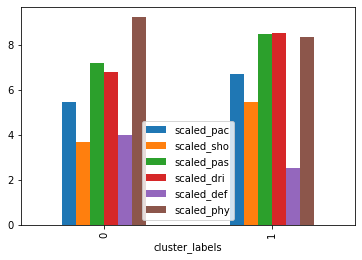

1 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
0 ['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín']


In [91]:
# FIFA 18: what makes a complete player?

features = ['pac', 'sho', 'pas', 'dri', 'def', 'phy']
scaled_features = ['scaled_pac',
 'scaled_sho',
 'scaled_pas',
 'scaled_dri',
 'scaled_def',
 'scaled_phy']
fifa['scaled_phy'] = whiten(fifa['phy'])
fifa['scaled_sho'] = whiten(fifa['sho'])
fifa['scaled_pas'] = whiten(fifa['pas'])
fifa['scaled_dri'] = whiten(fifa['dri'])
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_pac'] = whiten(fifa['pac'])

# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])